In [1]:
import pandas as pd
import numpy as np

In [2]:
crop=pd.read_csv("Crop_recommendation.csv")

In [3]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,market_demand,terrain_topology,irrigation,crop_rotation,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1,1,3,2,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1,1,3,2,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1,1,3,2,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1,1,3,2,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1,1,3,2,rice


In [4]:
crop.shape

(2200, 12)

In [5]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   N                 2200 non-null   int64  
 1   P                 2200 non-null   int64  
 2   K                 2200 non-null   int64  
 3   temperature       2200 non-null   float64
 4   humidity          2200 non-null   float64
 5   ph                2200 non-null   float64
 6   rainfall          2200 non-null   float64
 7   market_demand     2200 non-null   int64  
 8   terrain_topology  2200 non-null   int64  
 9   irrigation        2200 non-null   int64  
 10  crop_rotation     2200 non-null   int64  
 11  label             2200 non-null   object 
dtypes: float64(4), int64(7), object(1)
memory usage: 206.4+ KB


In [6]:
crop.isnull().sum()

N                   0
P                   0
K                   0
temperature         0
humidity            0
ph                  0
rainfall            0
market_demand       0
terrain_topology    0
irrigation          0
crop_rotation       0
label               0
dtype: int64

In [7]:
crop.duplicated().sum()

0

In [8]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall,market_demand,terrain_topology,irrigation,crop_rotation
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,1.500000,1.590909,1.681818,2.090909
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,0.584007,0.650958,0.873352,0.792707
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,1.000000,1.000000,1.000000,1.000000
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,1.000000,1.000000,1.000000,1.000000
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,1.000000,1.500000,1.000000,2.000000
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,2.000000,2.000000,3.000000,3.000000
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,3.000000,3.000000,3.000000,3.000000


In [9]:
numeric_crop=crop.select_dtypes(include='number')
numeric_crop.corr()

,N,P,K,temperature,humidity,ph,rainfall,market_demand,terrain_topology,irrigation,crop_rotation
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020,-0.181564,0.207712,0.278820,-0.042956
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839,-0.212858,-0.114142,0.331762,-0.003505
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461,-0.213810,-0.106369,0.077819,0.130791
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084,0.192720,0.001568,-0.090928,0.213482
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423,-0.209137,-0.161382,0.149718,0.203394
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069,0.063075,-0.003846,-0.017594,-0.202940
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000,-0.182309,-0.058038,0.145201,0.145583
market_demand,-0.181564,-0.212858,-0.213810,0.192720,-0.209137,0.063075,-0.182309,1.000000,0.059810,-0.222899,-0.294690
terrain_topology,0.207712,-0.114142,-0.106369,0.001568,-0.161382,-0.003846,-0.058038,0.059810,1.000000,-0.389039,-0.104150
irrigation,0.278820,0.331762,0.077819,-0.090928,0.149718,-0.017594,0.145201,-0.222899,-0.389039,1.000000,-0.286630


<Axes: >

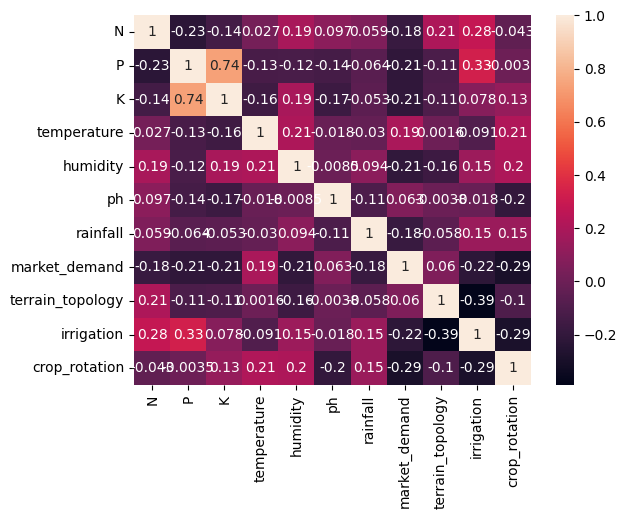

In [10]:
import seaborn as sns
sns.heatmap(numeric_crop.corr(), annot=True, cbar=True)

In [11]:
crop.label.value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [12]:
crop['label'].unique().size

22

C:\Users\Ravi Ranjan\AppData\Local\Temp\ipykernel_17188\1018874597.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop['P'])


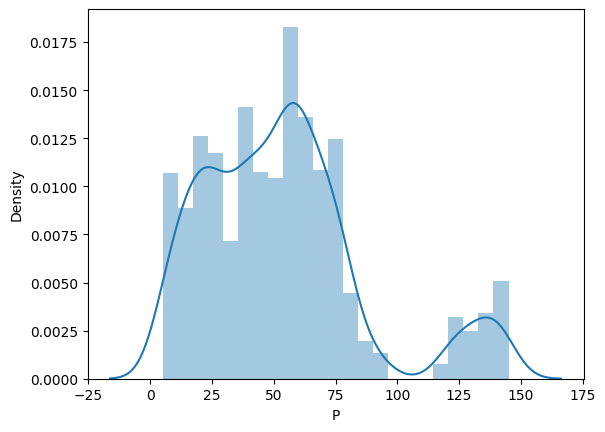

In [13]:
import matplotlib.pyplot as plt
sns.distplot(crop['P'])
plt.show()

C:\Users\Ravi Ranjan\AppData\Local\Temp\ipykernel_17188\2091051290.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop['N'])


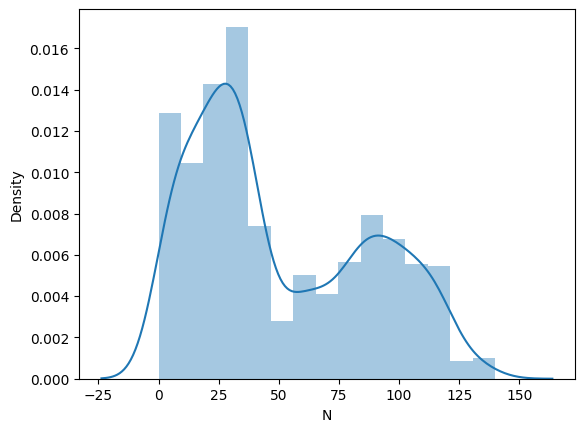

In [14]:
import matplotlib.pyplot as plt
sns.distplot(crop['N'])
plt.show()

In [15]:
crop.label.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [16]:
crop_dict={
    'rice':1,
    'maize':2,
    'jute':3,
    'cotton':4,
    'coconut':5,
    'papaya':6,
    'orange':7,
    'apple':8,
    'muskmelon':9,
    'watermelon':10,
    'grapes':11,
    'mango':12,
    'banana':13,
    'pomegranate':14,
    'lentil':15,
    'blackgram':16,
    'mungbean':17,
    'mothbeans':18,
    'pigeonpeas':19,
    'kidneybeans':20,
    'chickpea':21,
    'coffee':22
}
crop['label']=crop['label'].map(crop_dict)

In [17]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,market_demand,terrain_topology,irrigation,crop_rotation,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1,1,3,2,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1,1,3,2,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1,1,3,2,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1,1,3,2,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1,1,3,2,1


In [18]:
crop.label.unique()

array([ 1,  2, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,
        6,  5,  4,  3, 22], dtype=int64)

In [19]:
crop.label.value_counts()

label
1     100
2     100
3     100
4     100
5     100
6     100
7     100
8     100
9     100
10    100
11    100
12    100
13    100
14    100
15    100
16    100
17    100
18    100
19    100
20    100
21    100
22    100
Name: count, dtype: int64

In [20]:
X=crop.drop('label', axis=1)
y=crop['label']

In [21]:
X.head()

,N,P,K,temperature,humidity,ph,rainfall,market_demand,terrain_topology,irrigation,crop_rotation
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1,1,3,2
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1,1,3,2
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1,1,3,2
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1,1,3,2
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1,1,3,2


In [22]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.96,random_state=42)

In [24]:
X_train.shape

(88, 11)

In [25]:
from sklearn.preprocessing import MinMaxScaler
mx=MinMaxScaler()
X_train=mx.fit_transform(X_train)
X_test=mx.transform(X_test)

In [26]:
X_train

array([[0.18181818, 0.02173913, 0.14070352, 0.53162921, 0.96436103,
        0.22853543, 0.75377974, 0.        , 0.        , 0.        ,
        1.        ],
       [0.30578512, 0.47826087, 0.05527638, 0.45549095, 0.63027185,
        0.64136715, 0.10310388, 0.        , 0.        , 1.        ,
        0.        ],
       [0.27272727, 0.30434783, 0.20603015, 0.55881253, 0.94097241,
        0.52057922, 0.77637735, 0.5       , 0.5       , 0.        ,
        0.5       ],
       [0.29752066, 0.38405797, 0.10050251, 0.53958329, 0.51794065,
        0.90868048, 0.06511639, 1.        , 0.5       , 0.        ,
        0.5       ],
       [0.38842975, 0.42028986, 0.05527638, 0.49635355, 0.61299595,
        0.47639342, 0.21183863, 0.        , 0.5       , 0.        ,
        1.        ],
       [0.00826446, 0.05072464, 0.12562814, 0.50748738, 0.96512283,
        0.20276605, 0.45341754, 0.        , 0.        , 0.        ,
        1.        ],
       [0.33057851, 0.48550725, 0.36180905, 0.12736768, 0.

In [27]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [29]:
models={
    'LogisticRegression':LogisticRegression(),
    'GaussianNB':GaussianNB(),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
}

In [30]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    score=accuracy_score(y_test, y_pred)
    print(f"{name} model with accuracy: {score}")

LogisticRegression model with accuracy: 0.9663825757575758
GaussianNB model with accuracy: 0.9412878787878788
KNeighborsClassifier model with accuracy: 0.8319128787878788
DecisionTreeClassifier model with accuracy: 0.8517992424242424
RandomForestClassifier model with accuracy: 0.9895833333333334


In [31]:
randclf=RandomForestClassifier()
randclf.fit(X_train, y_train)
y_pred=randclf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9933712121212122

In [32]:
def recommendation(N, P, K, temperature, humidity, ph, rainfall, market_demand, terrain_topology, irrigation, crop_rotation):
    features=np.array([[N,P,K,temperature,humidity,ph,rainfall, market_demand, terrain_topology, irrigation, crop_rotation]])
    mx_features=mx.fit_transform(features)
    sc_mx_features=sc.fit_transform(mx_features)
    prediction=randclf.predict(sc_mx_features).reshape(1,-1)
    return prediction[0]

In [33]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,market_demand,terrain_topology,irrigation,crop_rotation,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1,1,3,2,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1,1,3,2,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1,1,3,2,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1,1,3,2,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1,1,3,2,1


In [34]:
N=90
P=42
K=43
temperature=20.879744
humidity=82.002744
ph=6.502985
rainfall=202.935536
market_demand = 1
terrain_topology = 1
irrigation = 3
crop_rotation = 2
predict=recommendation(N,P,K,temperature,humidity,ph,rainfall,market_demand,terrain_topology,irrigation,crop_rotation)

In [35]:
predict

array([10], dtype=int64)

In [36]:
import pickle
pickle.dump(randclf, open('model.pkl', 'wb'))
pickle.dump(mx, open('minmaxscaler.pkl', 'wb'))
pickle.dump(sc, open('standscaler.pkl', 'wb'))